### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
# import all necessary packages
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import zscore
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
df_vehicles = pd.read_csv("vehicle.csv")
print(df_vehicles.shape)
df_vehicles.head()

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
df_vehicles.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [4]:
# Keep the DataFrame with valid entries in the same variable
df_vehicles.dropna(inplace=True)
df_vehicles.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
df_vehicles["class"].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


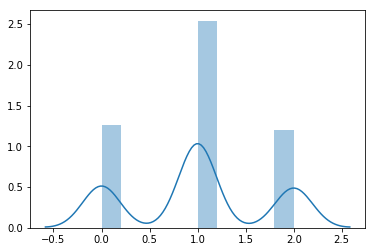

In [6]:
# convert class data into nemerial 0,1,2 for plotting
class_data = df_vehicles['class'].astype('category')
class_data = class_data.cat.codes

sns.distplot(class_data)

### Check for any missing values in the data 

In [7]:
df_vehicles.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [8]:
df_vehicles.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [9]:
# convert class into nemerial 0,1,2
df_vehicles['class'] = df_vehicles['class'].astype('category')
df_vehicles['class'] = df_vehicles['class'].cat.codes
df_vehicles.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [10]:
# convert all attributes to Z scale  
df_vehicles_z = df_vehicles.apply(zscore)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [11]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [12]:
cluster_range = range(1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_vehicles_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortion.append( clusters.inertia_ )    # capture the intertia
  #cluster_sil_scores.append(metrics.silhouette_score(df_vehicles_z, labels, metric='euclidean'))
  

# combine the cluster_range and distortion into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion} )
clusters_df[0:15]

,num_clusters,distortion
0,1,15447.000000
1,2,9415.219195
2,3,7833.371766
3,4,6531.236656
4,5,5953.986788
5,6,5386.685991
6,7,4965.629007
7,8,4561.312541
8,9,4217.435623


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

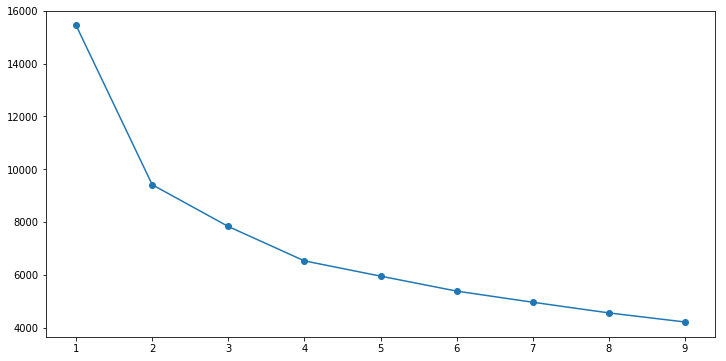

In [13]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(cluster_range, distortion, marker = "o" )

### Find out the optimal value of K

In [14]:
# as per elbow plot, optimal value of K is 3

In [15]:
clusters = KMeans(3, random_state = 1, n_init = 5)
clusters.fit(df_vehicles_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [16]:
# Get the centroids.... using function cluster_centers_
centroids = clusters.cluster_centers_
centroids

array([[-9.38778368e-01, -5.24912716e-01, -9.13772540e-01,
        -1.06527933e+00, -4.89774192e-01, -2.32843079e-01,
        -7.84266935e-01,  8.73373219e-01, -7.48321089e-01,
        -4.98331320e-01, -7.87179350e-01, -7.87691369e-01,
        -3.84447311e-01,  8.53216019e-01, -8.36357280e-02,
        -2.93616975e-01, -1.06840506e+00, -1.13740708e+00,
        -6.73178428e-03],
       [ 1.12659268e+00,  1.16657875e+00,  1.19211715e+00,
         1.02019737e+00,  2.18663761e-01,  3.38245656e-01,
         1.26895247e+00, -1.18899285e+00,  1.27274505e+00,
         1.08771688e+00,  1.21762716e+00,  1.27848759e+00,
         1.07632484e+00, -2.94024560e-02,  1.59836498e-01,
         2.64780860e-01, -1.58395088e-03,  1.84272997e-01,
        -2.06449877e-01],
       [-2.31633350e-01, -5.71364562e-01, -3.04119963e-01,
        -5.02551075e-02,  1.83046352e-01, -1.05880103e-01,
        -4.63387588e-01,  3.31496620e-01, -4.93157732e-01,
        -5.26139579e-01, -4.18970162e-01, -4.68699648e-01,
    

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [17]:
# storing raw centroid values into a dataframe under respective columns
veh_centroid_df = pd.DataFrame(centroids, columns = list(df_vehicles_z) )
veh_centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,-0.938778,-0.524913,-0.913773,-1.065279,-0.489774,-0.232843,-0.784267,0.873373,-0.748321,-0.498331,-0.787179,-0.787691,-0.384447,0.853216,-0.083636,-0.293617,-1.068405,-1.137407,-0.006732
1,1.126593,1.166579,1.192117,1.020197,0.218664,0.338246,1.268952,-1.188993,1.272745,1.087717,1.217627,1.278488,1.076325,-0.029402,0.159836,0.264781,-0.001584,0.184273,-0.206450
2,-0.231633,-0.571365,-0.304120,-0.050255,0.183046,-0.105880,-0.463388,0.331497,-0.493158,-0.526140,-0.418970,-0.468700,-0.601185,-0.608302,-0.069599,-0.000340,0.793339,0.691468,0.174970


### Use kmeans.labels_ function to print out the labels of the classes

In [18]:
labels = clusters.labels_  # capture the cluster lables
labels

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

In [19]:
df_vehicles_z["labels"] = labels
df_vehicles_z.groupby(["labels"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
labels,,,,,,,,,,,,,,,,,,,
0,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235
1,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261
2,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317


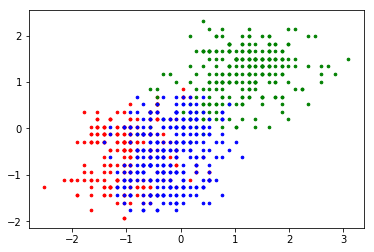

In [20]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
labels_num = [0,1,2]
for i in labels_num:
        points = np.array(df_vehicles_z.loc[df_vehicles_z['labels'] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F85C7656A0>,
      dtype=object)

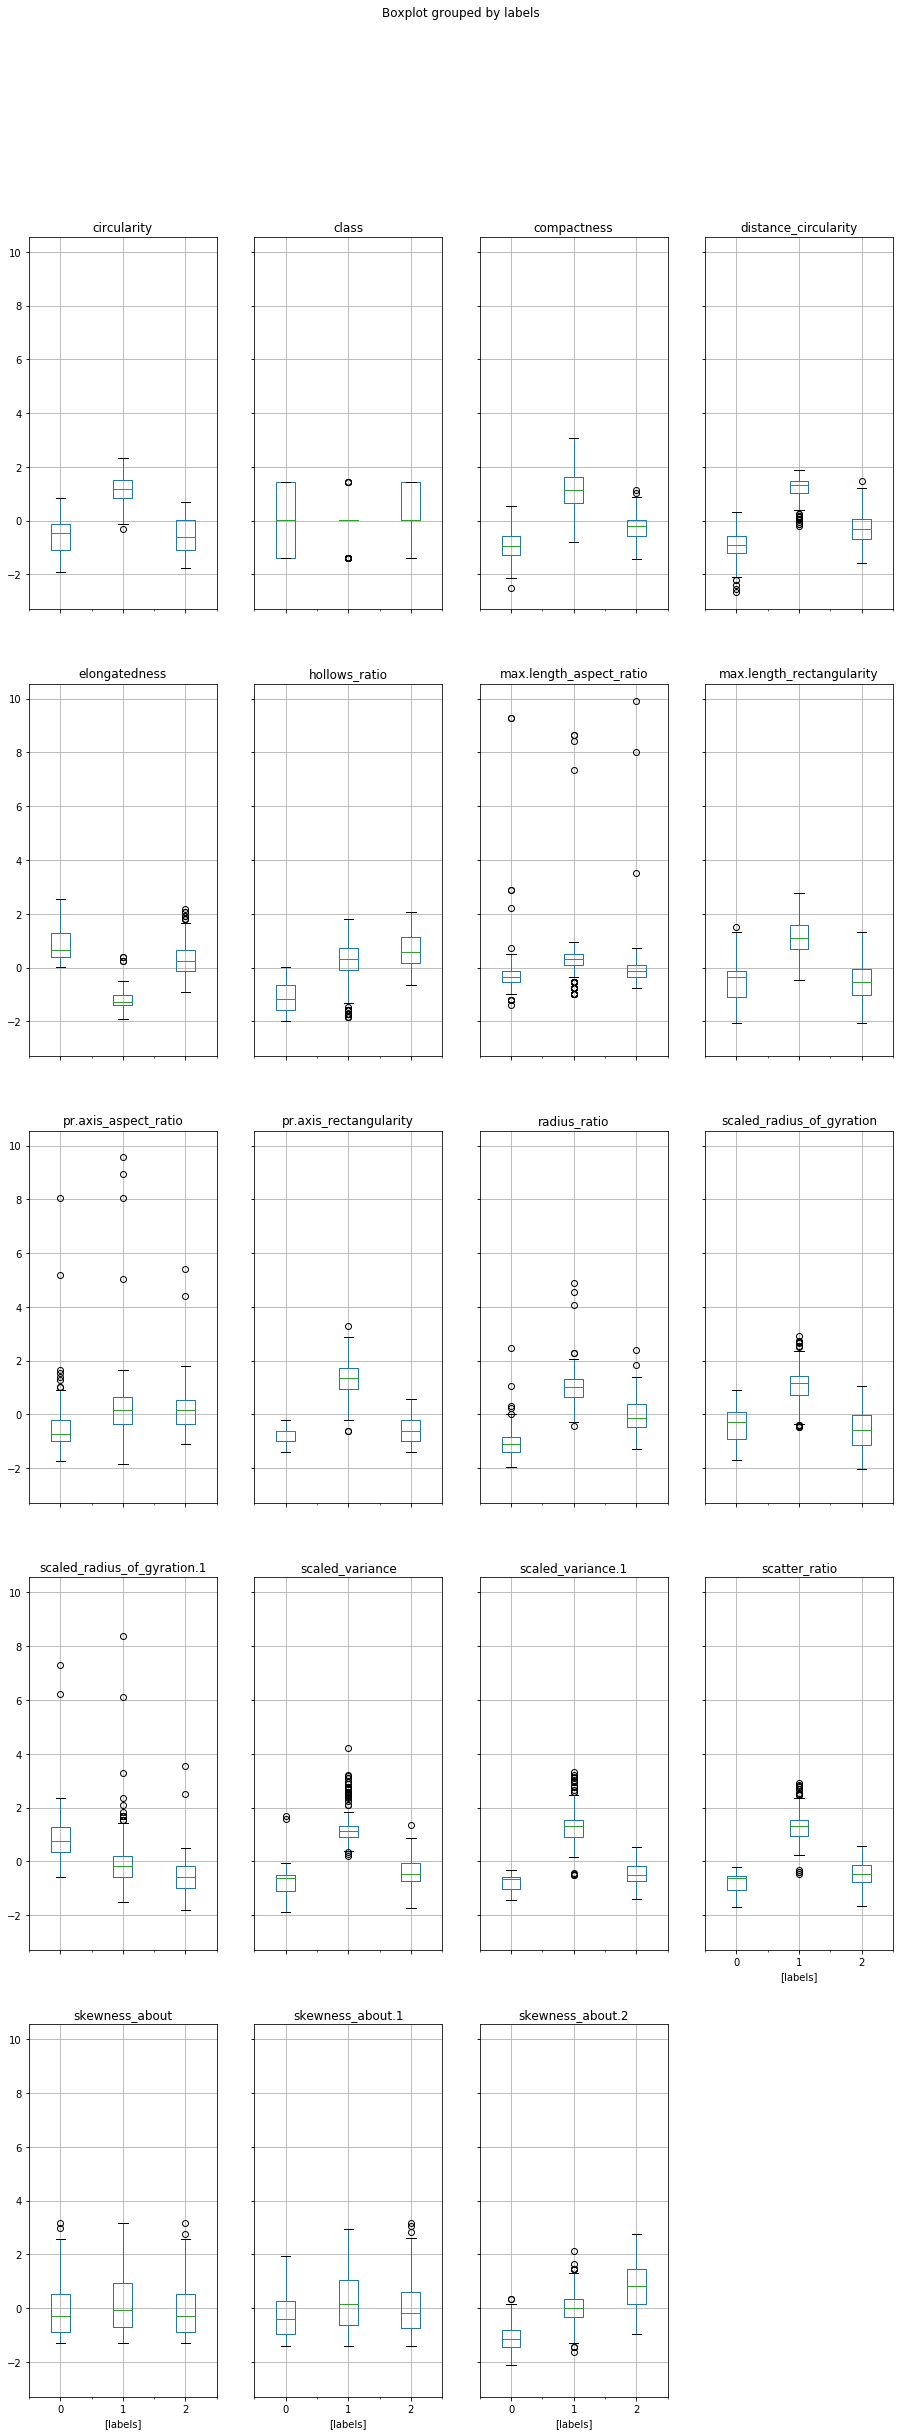

In [21]:
df_vehicles_z.boxplot(by = 'labels',figsize=(15, 40))

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [22]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [23]:
print("Shape a:", a.shape)
print("Shape b:", b.shape)
print("Shape c:", c.shape)

Shape a: (100, 2)
Shape b: (50, 2)
Shape c: (100, 2)


### 9. Combine all three arrays a,b,c into a dataframe

In [24]:
combine_array = np.concatenate((a,b,c))
combine_array.shape

(250, 2)

In [25]:
df = pd.DataFrame(combine_array, columns=["f1","f2"])
df.shape

(250, 2)

In [26]:
df.head()

,f1,f2
0,8.152180,0.056787
1,10.146164,-1.721757
2,9.776249,-1.038066
3,11.647677,0.664060
4,8.333730,-0.378912


### 10. Use scatter matrix to print all the 3 distributions

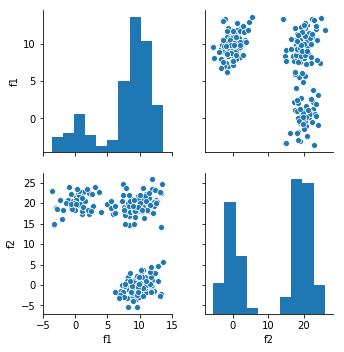

In [27]:
sns.pairplot(df)

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [28]:
Z = linkage(df, method = "ward")
print("Z shape", Z.shape)

c, coph_dists = cophenet(Z , pdist(df))
print("cophenet index: ", c)

Z shape (249, 4)
cophenet index:  0.9506164698779508


In [29]:
Z[1:10]

array([[1.77000000e+02, 2.46000000e+02, 4.95708284e-02, 2.00000000e+00],
       [3.40000000e+01, 5.20000000e+01, 6.21261131e-02, 2.00000000e+00],
       [2.00000000e+00, 4.40000000e+01, 7.70219660e-02, 2.00000000e+00],
       [1.82000000e+02, 2.06000000e+02, 9.43776388e-02, 2.00000000e+00],
       [1.00000000e+01, 1.20000000e+01, 9.58794377e-02, 2.00000000e+00],
       [5.80000000e+01, 6.60000000e+01, 1.01339145e-01, 2.00000000e+00],
       [6.10000000e+01, 2.53000000e+02, 1.09429808e-01, 3.00000000e+00],
       [1.55000000e+02, 2.22000000e+02, 1.20550182e-01, 2.00000000e+00],
       [7.00000000e+00, 3.10000000e+01, 1.20833330e-01, 2.00000000e+00]])

### 12. Plot the dendrogram for the consolidated dataframe

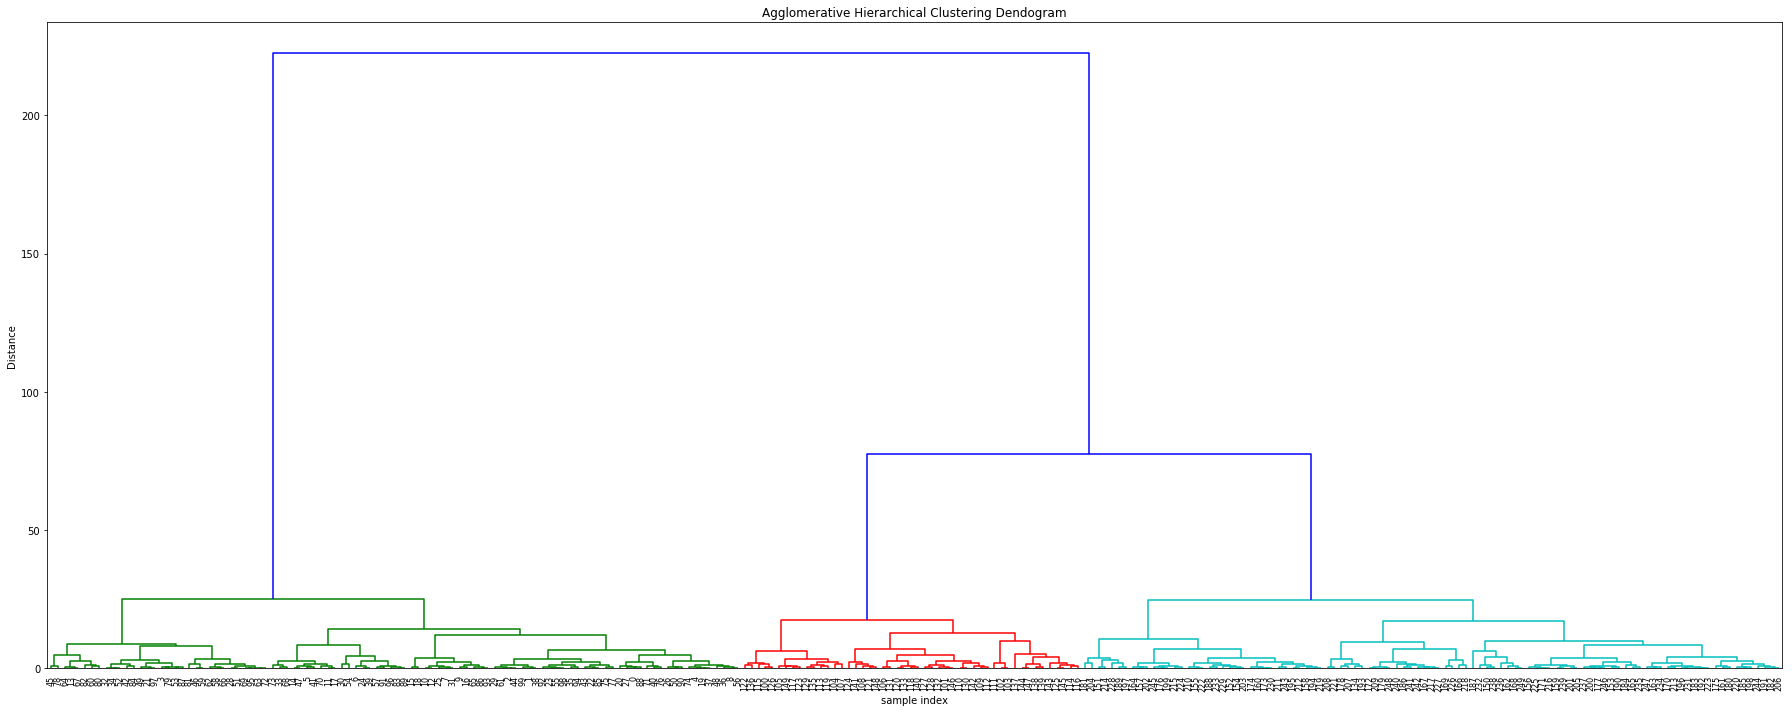

In [30]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

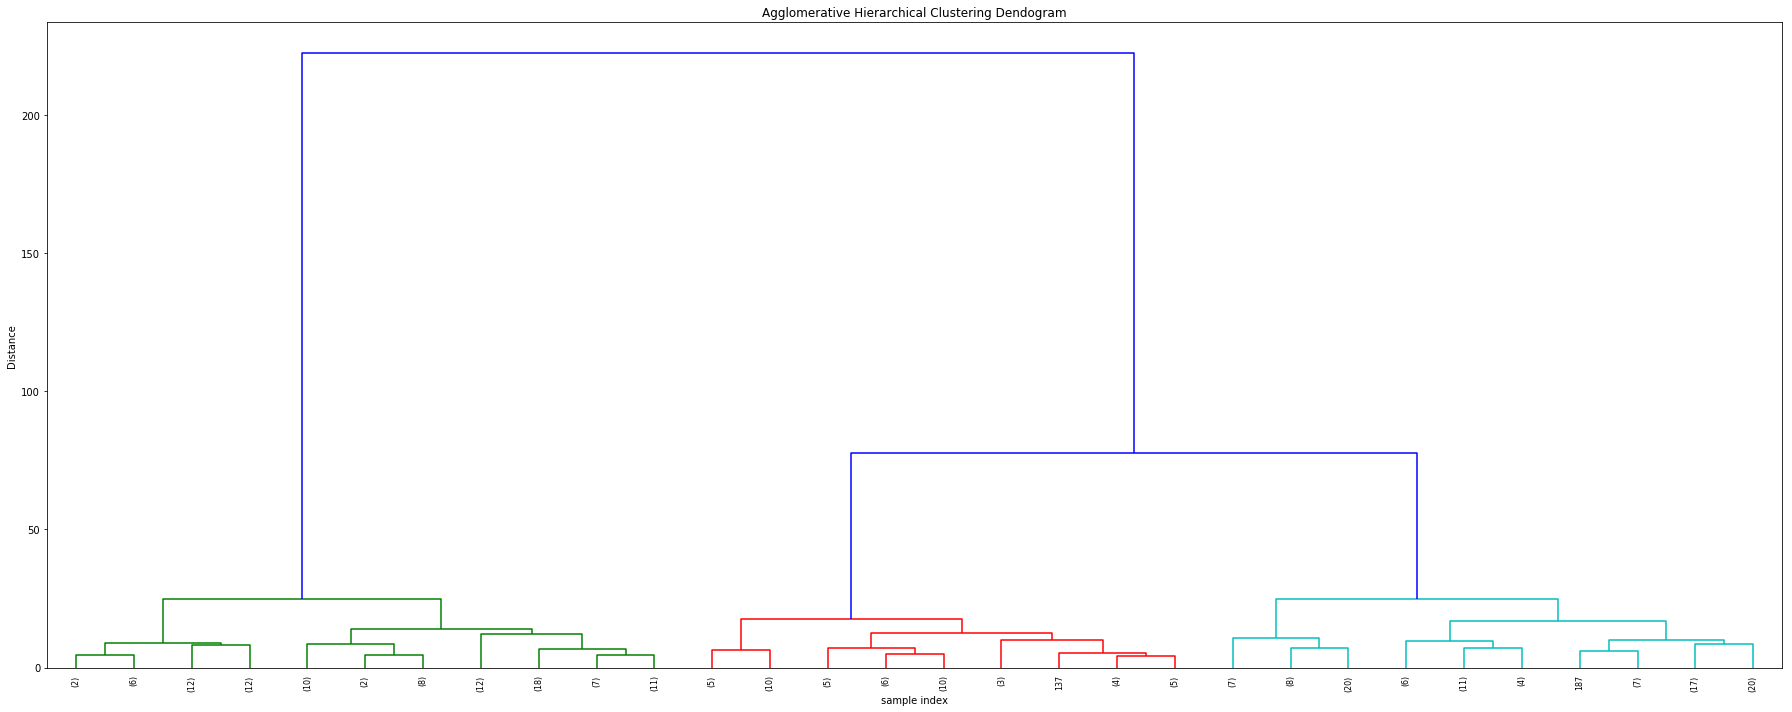

In [31]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
r = dendrogram(Z,  truncate_mode='lastp', leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [32]:
# from dendrogram, optimal distance between cluster is 55 whcih can be used for clustering data
threshold = 55

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [33]:
# Form flat clusters from the hierarchical clustering defined by the given linkage matrix.
clusters = fcluster(Z, 55, criterion='distance')
df["clusters"] = clusters

In [34]:
df.groupby(["clusters"]).count()

,f1,f2
clusters,,
1,100,100
2,49,49
3,101,101


In [35]:
nclusts = np.unique(clusters).shape[0]
nclusts

3

### Use matplotlib to visually observe the clusters in 2D space 

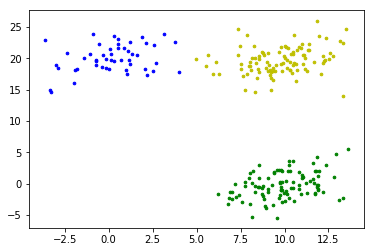

In [36]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
labels_num = [1,2,3]

for i in labels_num:
        points = np.array(df.loc[df['clusters'] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])